In [140]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [144]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'

engine = create_engine(connection_string)

query = '''select title as film_name, l.name as language, length, rating, special_features, c.name as film_category,
case when date_format(rental_date, '%%m-%%Y') = '06-2005'
then 1 Else 0 End as 'rented'
from film f
join film_category fc
using(film_id)
join language l
using(language_id) 
join category c
using(category_id)
join inventory i
using(film_id)
left join rental r
using(inventory_id)
group by title, l.name, length, rating, special_features, c.name;'''

data = pd.read_sql_query(query, engine)
data.head()

,film_name,language,length,rating,special_features,film_category,rented
0,AMADEUS HOLY,English,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action,0
1,AMERICAN CIRCUS,English,129,R,"Commentaries,Behind the Scenes",Action,0
2,ANTITRUST TOMATOES,English,168,NC-17,"Trailers,Commentaries,Deleted Scenes",Action,0
3,BAREFOOT MANCHURIAN,English,129,G,"Trailers,Commentaries",Action,1
4,BERETS AGENT,English,77,PG-13,Deleted Scenes,Action,0


In [145]:
data.isna().sum()

film_name           0
language            0
length              0
rating              0
special_features    0
film_category       0
rented              0
dtype: int64

In [146]:
data.shape

(958, 7)

In [147]:
data.dtypes

film_name           object
language            object
length               int64
rating              object
special_features    object
film_category       object
rented               int64
dtype: object

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

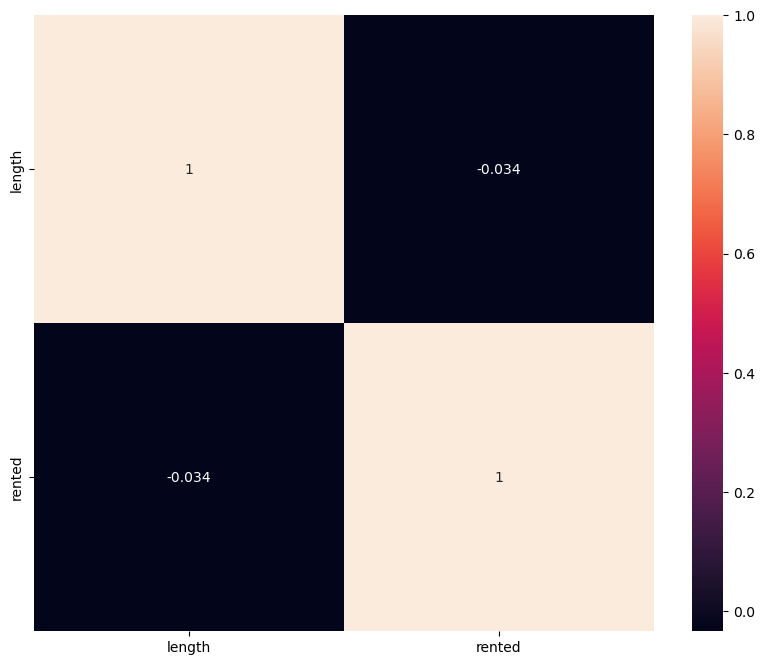

In [149]:
corr_matrix=data.corr()  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [150]:
data.corr()

,length,rented
length,1.000000,-0.033731
rented,-0.033731,1.000000


In [151]:
#separate the features from the labels
y = data['rented']
X = data.drop(['rented'], axis=1)

In [152]:
X.head()

,film_name,language,length,rating,special_features,film_category
0,AMADEUS HOLY,English,113,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action
1,AMERICAN CIRCUS,English,129,R,"Commentaries,Behind the Scenes",Action
2,ANTITRUST TOMATOES,English,168,NC-17,"Trailers,Commentaries,Deleted Scenes",Action
3,BAREFOOT MANCHURIAN,English,129,G,"Trailers,Commentaries",Action
4,BERETS AGENT,English,77,PG-13,Deleted Scenes,Action


In [153]:
import pandas as pd
import numpy as np

In [154]:
#categorical features and numerical ones are going to be treated differently
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [155]:
# Normalizing and Standardizing data - only for numerical variables
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
length,958.0,115.490605,40.471844,46.0,80.25,114.0,150.0,185.0


In [156]:
# in this case there is only one numerical variable so we don´t normalize or standarize

In [157]:
X_cat.head()

,film_name,language,rating,special_features,film_category
0,AMADEUS HOLY,English,PG,"Commentaries,Deleted Scenes,Behind the Scenes",Action
1,AMERICAN CIRCUS,English,R,"Commentaries,Behind the Scenes",Action
2,ANTITRUST TOMATOES,English,NC-17,"Trailers,Commentaries,Deleted Scenes",Action
3,BAREFOOT MANCHURIAN,English,G,"Trailers,Commentaries",Action
4,BERETS AGENT,English,PG-13,Deleted Scenes,Action


In [158]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [159]:
#here we deal with the categorical column special_features and clean the categorical variables
X_cat['special_features'] = X_cat['special_features'].str.split(',')
X_cat1 = X_cat.drop('special_features',1).join(X_cat.special_features.str.join('|').str.get_dummies())
X_cat1

/var/folders/y5/7v3j89sd4ps24p3x50lkvwf80000gn/T/ipykernel_20814/1309955536.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_cat1 = X_cat.drop('special_features',1).join(X_cat.special_features.str.join('|').str.get_dummies())


,film_name,language,rating,film_category,Behind the Scenes,Commentaries,Deleted Scenes,Trailers
0,AMADEUS HOLY,English,PG,Action,1,1,1,0
1,AMERICAN CIRCUS,English,R,Action,1,1,0,0
2,ANTITRUST TOMATOES,English,NC-17,Action,0,1,1,1
3,BAREFOOT MANCHURIAN,English,G,Action,0,1,0,1
4,BERETS AGENT,English,PG-13,Action,0,0,1,0
...,...,...,...,...,...,...,...,...
953,VALENTINE VANISHING,English,PG-13,Travel,1,0,0,1
954,WINDOW SIDE,English,R,Travel,1,0,1,0
955,WOLVES DESIRE,English,NC-17,Travel,1,0,0,0
956,WORKER TARZAN,English,R,Travel,1,1,0,1


In [160]:
data1 = X_cat1.drop(['Behind the Scenes','Commentaries','Deleted Scenes','Trailers'], axis=1)

In [163]:
encoder = OneHotEncoder().fit(data1)
OneHotEncoder(drop='first').fit(data1)
print(encoder.categories_)
encoded = encoder.transform(data1).toarray()
print(encoded)
onehot_encoded = pd.Data1frame(encoded,columns=['film_name', 'language','rating', 'film_category'])

[array(['ACADEMY DINOSAUR', 'ACE GOLDFINGER', 'ADAPTATION HOLES',
       'AFFAIR PREJUDICE', 'AFRICAN EGG', 'AGENT TRUMAN',
       'AIRPLANE SIERRA', 'AIRPORT POLLOCK', 'ALABAMA DEVIL',
       'ALADDIN CALENDAR', 'ALAMO VIDEOTAPE', 'ALASKA PHANTOM',
       'ALI FOREVER', 'ALIEN CENTER', 'ALLEY EVOLUTION', 'ALONE TRIP',
       'ALTER VICTORY', 'AMADEUS HOLY', 'AMELIE HELLFIGHTERS',
       'AMERICAN CIRCUS', 'AMISTAD MIDSUMMER', 'ANACONDA CONFESSIONS',
       'ANALYZE HOOSIERS', 'ANGELS LIFE', 'ANNIE IDENTITY',
       'ANONYMOUS HUMAN', 'ANTHEM LUKE', 'ANTITRUST TOMATOES',
       'ANYTHING SAVANNAH', 'APACHE DIVINE', 'APOCALYPSE FLAMINGOS',
       'ARABIA DOGMA', 'ARACHNOPHOBIA ROLLERCOASTER', 'ARIZONA BANG',
       'ARMAGEDDON LOST', 'ARMY FLINTSTONES', 'ARTIST COLDBLOODED',
       'ATLANTIS CAUSE', 'ATTACKS HATE', 'ATTRACTION NEWTON',
       'AUTUMN CROW', 'BABY HALL', 'BACKLASH UNDEFEATED', 'BADMAN DAWN',
       'BAKED CLEOPATRA', 'BALLOON HOMEWARD', 'BALLROOM MOCKINGBIRD',
       'BA

AttributeError: module 'pandas' has no attribute 'Data1frame'

In [125]:
# let's merge all this information together into a single dataset with all features, now numerical
X = pd.concat([X_num, encoded], axis=1)  # np.concatenate()

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid